In [9]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
ruta = "D:/UNA-PUNO/UNA-SEMESTRES/SEPTIMO SEMESTRE/APRENDIZAJE SUPERVISADO/tecnicas de regresion/aprendizaje_supervisado/Boston.csv"
# Cargar los datos
boston_data = pd.read_csv(ruta)

# Visualizar las primeras filas
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Definir las variables X y Y
Vamos a asignar rm como la variable independiente (número de habitaciones promedio) y medv como la variable dependiente (valor medio de la vivienda).

In [3]:
# Definir las variables X (predictor) y Y (variable objetivo)
X = boston_data[['rm']]  # Habitaciones promedio (X)
Y = boston_data['medv']   # Valor medio de la vivienda (Y)

## Dividir los datos en entrenamiento y prueba
Dividimos los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

In [4]:
# División del conjunto en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (404, 1)
Tamaño del conjunto de prueba: (102, 1)


## Ajustar el modelo de regresión lineal
Ahora vamos a ajustar el modelo de regresión lineal simple con X_train y Y_train.

In [5]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, Y_train)

# Mostrar los coeficientes del modelo
print(f"Intercepto (beta_0): {modelo.intercept_}")
print(f"Pendiente (beta_1): {modelo.coef_[0]}")

Intercepto (beta_0): -36.24631889813792
Pendiente (beta_1): 9.348301406497722


## Hacer predicciones
Con el modelo ajustado, hacemos predicciones en el conjunto de prueba.

In [6]:
# Hacer predicciones con el conjunto de prueba
Y_pred = modelo.predict(X_test)

# Mostrar las primeras predicciones
Y_pred[:5]


array([23.73238293, 26.92950201, 19.68456842, 20.45112913, 22.61993506])

## Evaluar el modelo
Finalmente, evaluamos el modelo calculando el coeficiente de determinación R2 y el error cuadrático medio (MSE).

In [7]:
# Calcular R^2 y MSE
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5  # Raíz del MSE

# Mostrar los resultados
print(f"R^2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R^2: 0.3707569232254778
MSE: 46.144775347317264
RMSE: 6.792994578778734


## Visualizar los resultados
Finalmente, creamos una gráfica para visualizar la línea de regresión.

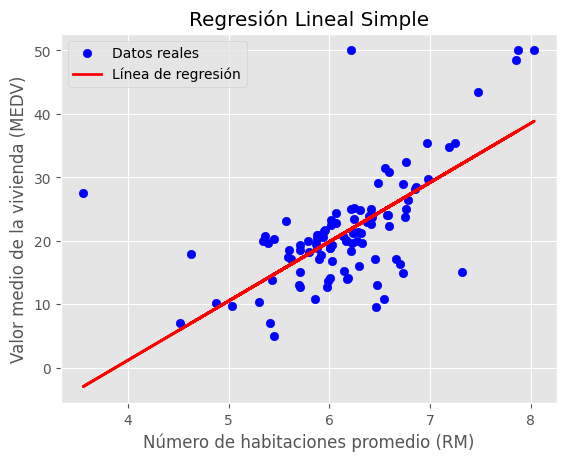

In [8]:
# Graficar los puntos de datos reales y la línea de regresión
plt.scatter(X_test, Y_test, color='blue', label='Datos reales')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Número de habitaciones promedio (RM)')
plt.ylabel('Valor medio de la vivienda (MEDV)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()

## Crear las características polinomiales
Primero, crearemos características polinomiales a partir de nuestra variable independiente rm (número de habitaciones).

In [13]:
# Crear características polinomiales de grado 2 (puedes cambiar el grado)
poly = PolynomialFeatures(degree=2)  # También puedes probar con degree=3 o mayor
X_poly = poly.fit_transform(X)
poly

PolynomialFeatures()

In [18]:
# Crear el modelo de regresión lineal
modelo_poly = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento polinomiales
modelo_poly.fit(X_train, Y_train)

# Mostrar los coeficientes del modelo polinomial
print(f"Coeficientes del modelo: {modelo_poly.coef_}")
print(f"Intercepto: {modelo_poly.intercept_}")


Coeficientes del modelo: [9.34830141]
Intercepto: -36.24631889813792


## Hacer predicciones con el modelo polinomial
Realizamos predicciones usando el conjunto de prueba.

In [15]:
# Hacer predicciones con el conjunto de prueba
Y_pred_poly = modelo_poly.predict(X_test)

# Mostrar las primeras predicciones
Y_pred_poly[:5]


array([23.73238293, 26.92950201, 19.68456842, 20.45112913, 22.61993506])

## Evaluar el modelo polinomial
Evaluamos el modelo polinomial calculando el R² y el RMSE.

In [16]:
# Evaluar el rendimiento del modelo
r2_poly = r2_score(Y_test, Y_pred_poly)
mse_poly = mean_squared_error(Y_test, Y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

# Mostrar los resultados
print(f"R² del modelo polinomial: {r2_poly}")
print(f"MSE del modelo polinomial: {mse_poly}")
print(f"RMSE del modelo polinomial: {rmse_poly}")


R² del modelo polinomial: 0.3707569232254778
MSE del modelo polinomial: 46.144775347317264
RMSE del modelo polinomial: 6.792994578778734


## Visualizar los resultados
Finalmente, creamos una gráfica para visualizar la relación entre rm y medv con el modelo polinomial.

ValueError: X has 4 features, but LinearRegression is expecting 1 features as input.

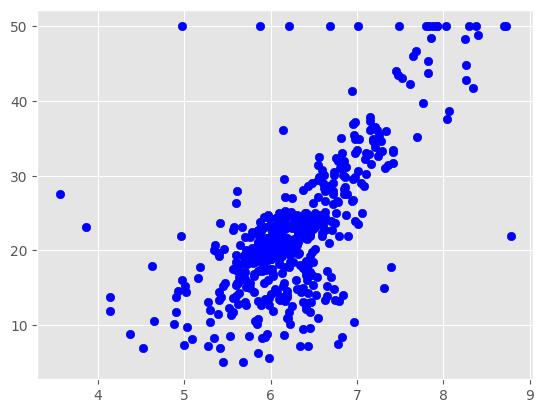

In [23]:
# Graficar los resultados del modelo polinomial
plt.scatter(X['rm'], Y, color='blue', label='Datos reales')

# Ordenar X para graficar la línea polinomial correctamente
X_fit = np.sort(X['rm'])

# Crear las características polinomiales para X_fit
X_fit_poly = poly.transform(X_fit[:, np.newaxis])  # Asegúrate de aplicar el mismo polinomio transformado

# Realizar la predicción con el modelo polinomial entrenado
Y_pred_fit = modelo_poly.predict(X_fit_poly)

# Graficar la línea de regresión polinomial
plt.scatter(X['rm'], Y, color='blue', label='Datos reales')
plt.plot(X_fit, Y_pred_fit, color='red', label='Regresión polinomial', linewidth=2)
plt.xlabel('Número de habitaciones promedio (RM)')
plt.ylabel('Valor medio de la vivienda (MEDV)')
plt.title('Regresión Polinomial')
plt.legend()
plt.show()

